<a href="https://colab.research.google.com/github/baisali14/Hypertension-Heart-Disease-and-Stroke-Prediction-using-SVM/blob/main/Hypertension%2CHeart_Disease_and_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
from google.colab import drive

In [76]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import numpy as np
import pandas as pd

#READING DATA

In [78]:
df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

In [79]:
#Showing the complete dataset
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [80]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [81]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [82]:
#Showing the number of rows and columns
df.shape

(5110, 12)

In [83]:
#Showing the statistical measures of the data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [84]:
#Showing some extra information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [85]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [86]:
#Replacing the missing values in bmi column with mode value
df['bmi'].fillna(df['bmi'].mean(),inplace = True)

In [87]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [88]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#DATA VISUALISATION

In [89]:
import seaborn as sns
sns.set()

In [90]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

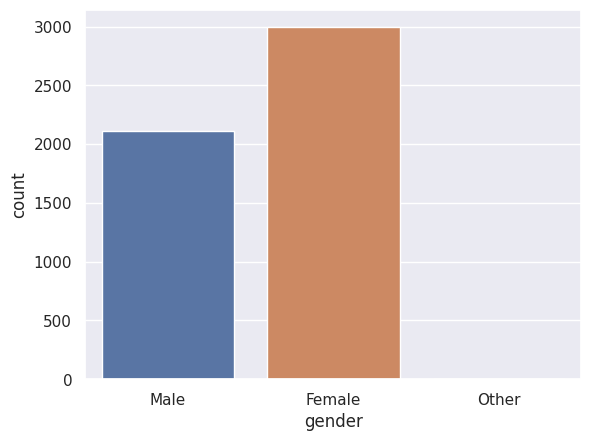

In [91]:
#Making a count plot for gender column
sns.countplot(x ='gender', data = df)

In [92]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

<Axes: xlabel='ever_married', ylabel='count'>

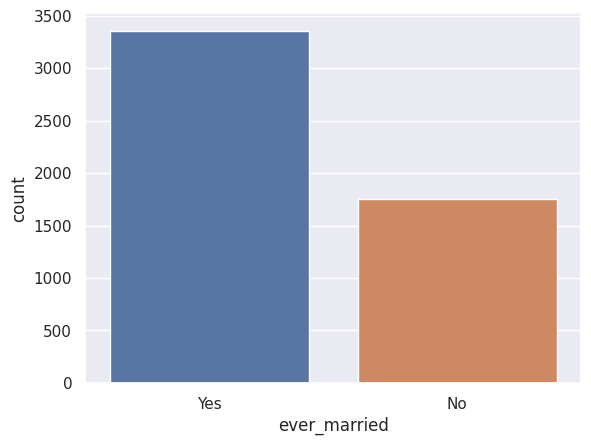

In [93]:
#Making a count plot for ever_married column
sns.countplot(x = 'ever_married', data = df)

In [94]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<Axes: xlabel='work_type', ylabel='count'>

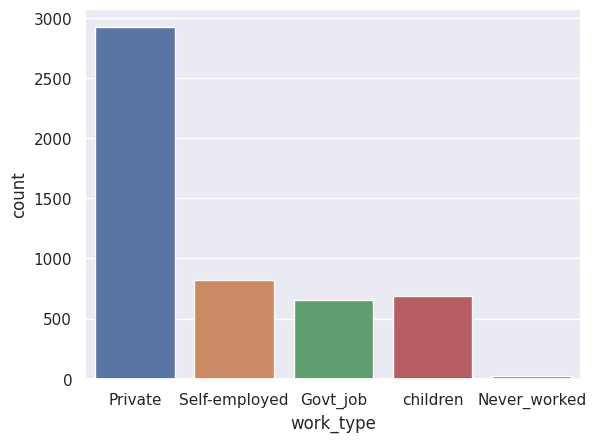

In [95]:
#Making a count plot for work_type column
sns.countplot(x = 'work_type', data = df)

In [96]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

<Axes: xlabel='Residence_type', ylabel='count'>

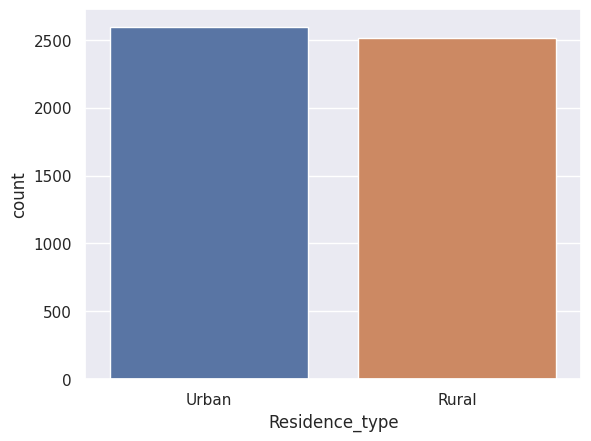

In [97]:
#Making a count plot for Residence_type column
sns.countplot(x = 'Residence_type', data = df)

In [98]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<Axes: xlabel='smoking_status', ylabel='count'>

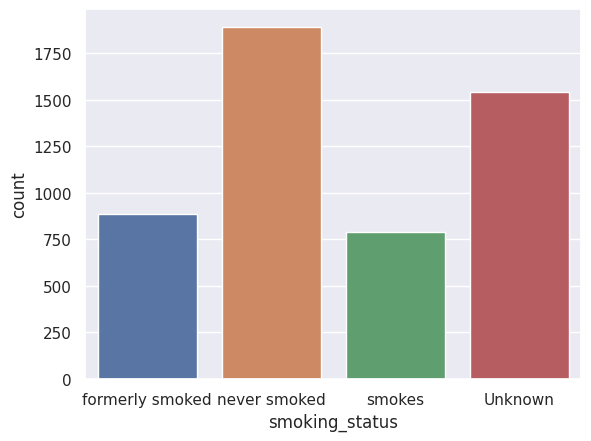

In [99]:
#Making a count plot for smoking_status column
sns.countplot(x = 'smoking_status', data = df)

In [100]:
df['hypertension'].value_counts()
#0 represents No Hypertension
#1 represents Hypertension

0    4612
1     498
Name: hypertension, dtype: int64

<Axes: xlabel='hypertension', ylabel='count'>

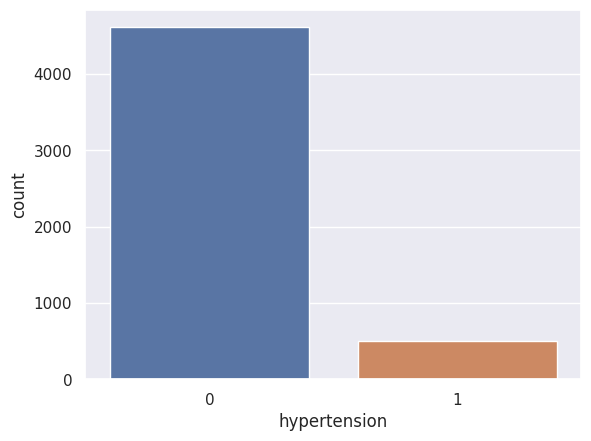

In [101]:
#Making a count plot for hypertension column
sns.countplot(x = 'hypertension', data = df)

In [102]:
df['heart_disease'].value_counts()
#0 represents No Heart Disease
#1 represents Heart Disease

0    4834
1     276
Name: heart_disease, dtype: int64

<Axes: xlabel='heart_disease', ylabel='count'>

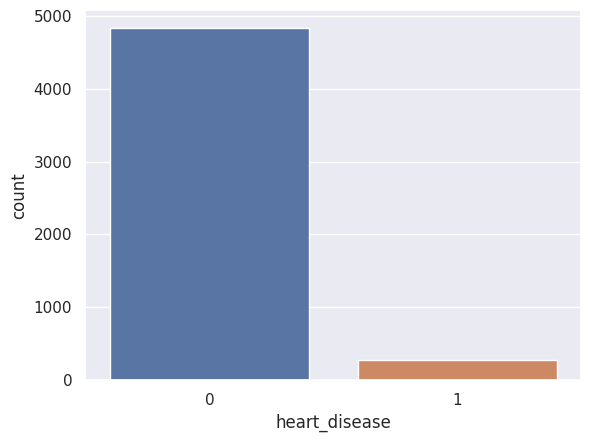

In [103]:
#Making a count plot for heart_disease column
sns.countplot(x = 'heart_disease', data = df)

In [104]:
df['stroke'].value_counts()
#0 represents No Stroke
#1 represents Stroke

0    4861
1     249
Name: stroke, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

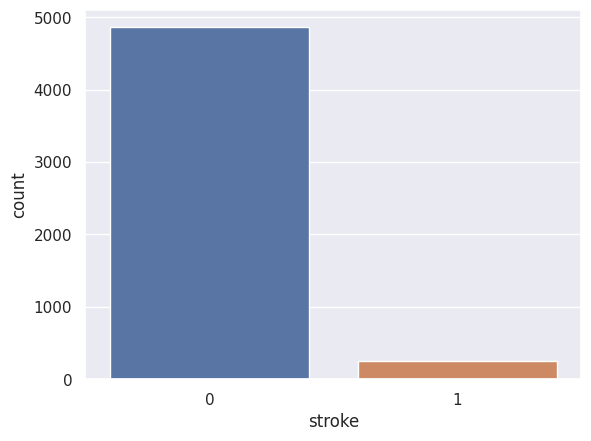

In [105]:
#Making a count plot for stroke column
sns.countplot(x = 'stroke', data = df)

<Axes: xlabel='gender', ylabel='count'>

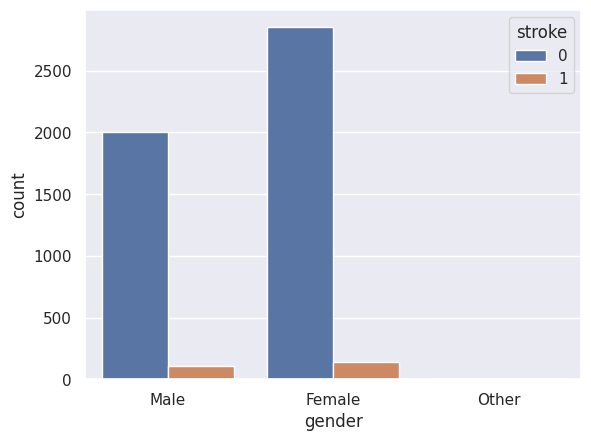

In [106]:
#Showing stroke and no stroke genderwise
sns.countplot(x = 'gender', hue ='stroke', data = df)

<Axes: xlabel='gender', ylabel='count'>

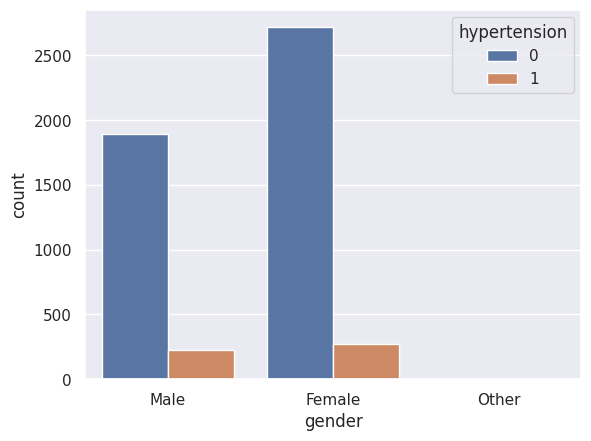

In [107]:
#Showing hypertension and no hypertension genderwise
sns.countplot(x = 'gender', hue ='hypertension', data = df)

<Axes: xlabel='gender', ylabel='count'>

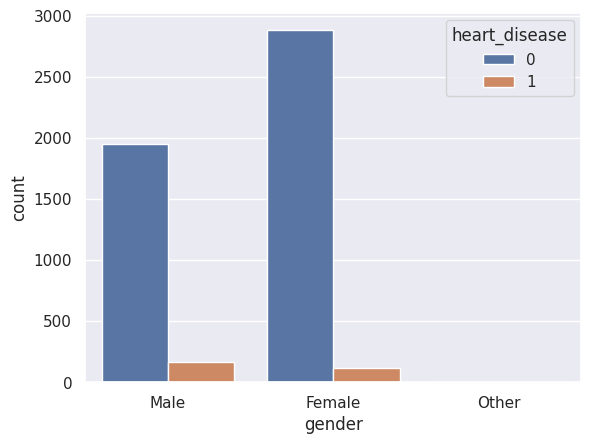

In [108]:
#Showing heart disease and no heart disease genderwise
sns.countplot(x = 'gender', hue ='heart_disease', data = df)

In [109]:
df = df.drop(columns = ['ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis = 1)

In [110]:
df

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,Male,67.0,0,1,228.69,36.600000,1
1,51676,Female,61.0,0,0,202.21,28.893237,1
2,31112,Male,80.0,0,1,105.92,32.500000,1
3,60182,Female,49.0,0,0,171.23,34.400000,1
4,1665,Female,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,83.75,28.893237,0
5106,44873,Female,81.0,0,0,125.20,40.000000,0
5107,19723,Female,35.0,0,0,82.99,30.600000,0
5108,37544,Male,51.0,0,0,166.29,25.600000,0


In [111]:
df.replace({'gender' : {'Male' : 0 , 'Female' : 1 , 'Other' : 2}}, inplace = True)

In [112]:
df

,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,0,67.0,0,1,228.69,36.600000,1
1,51676,1,61.0,0,0,202.21,28.893237,1
2,31112,0,80.0,0,1,105.92,32.500000,1
3,60182,1,49.0,0,0,171.23,34.400000,1
4,1665,1,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,83.75,28.893237,0
5106,44873,1,81.0,0,0,125.20,40.000000,0
5107,19723,1,35.0,0,0,82.99,30.600000,0
5108,37544,0,51.0,0,0,166.29,25.600000,0


In [113]:
#Seperating the data and labels
X = df.drop(columns = ['gender', 'hypertension' , 'heart_disease', 'stroke'], axis = 1)
Y_hypertension = df['hypertension']
Y_heartdisease = df['heart_disease']
Y_stroke = df['stroke']

In [114]:
X

,id,age,avg_glucose_level,bmi
0,9046,67.0,228.69,36.600000
1,51676,61.0,202.21,28.893237
2,31112,80.0,105.92,32.500000
3,60182,49.0,171.23,34.400000
4,1665,79.0,174.12,24.000000
...,...,...,...,...
5105,18234,80.0,83.75,28.893237
5106,44873,81.0,125.20,40.000000
5107,19723,35.0,82.99,30.600000
5108,37544,51.0,166.29,25.600000


In [115]:
#Data standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
standard = scaler.transform(X)
X = standard

In [116]:
X

array([[-1.29831203e+00,  1.05143428e+00,  2.70637544e+00,
         1.00123401e+00],
       [ 7.16371490e-01,  7.86070073e-01,  2.12155854e+00,
         4.61555355e-16],
       [-2.55478192e-01,  1.62639008e+00, -5.02830130e-03,
         4.68577254e-01],
       ...,
       [-7.93719586e-01, -3.63841511e-01, -5.11442636e-01,
         2.21736316e-01],
       [ 4.84965773e-02,  3.43796387e-01,  1.32825706e+00,
        -4.27845098e-01],
       [ 3.85694957e-01,  3.42048064e-02, -4.60867458e-01,
        -3.49895329e-01]])

In [117]:
Y_hypertension

0       0
1       0
2       0
3       0
4       1
       ..
5105    1
5106    0
5107    0
5108    0
5109    0
Name: hypertension, Length: 5110, dtype: int64

In [118]:
Y_heartdisease

0       1
1       0
2       1
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: heart_disease, Length: 5110, dtype: int64

In [119]:
Y_stroke

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

#SPLIT DATA IN TEST AND TRAIN FOR HYPERTENSION PREDICTION

In [120]:
#Train,Test,Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_hypertension, test_size = 0.2, stratify = Y_hypertension, random_state = 2)

In [121]:
from sklearn import svm
model = svm.SVC(kernel = 'linear')

In [122]:
#Training the SVM Model
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [123]:
#Finding the accuracy score on train dataset
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [124]:
train_data_accuracy

0.9026418786692759

In [125]:
#Finding the accuracy score on test dataset
from sklearn.metrics import accuracy_score
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [126]:
test_data_accuracy

0.9021526418786693

#MODEL EVALUATION FOR HYPERTENSION PREDICTION

In [127]:
#Predicting System
data = (19273,35.0,82.99,30.6)
#Converting to numpy array
data_array = np.asarray(data)

#Reshaping the array
data_reshape = data_array.reshape(1, -1)

#Standardizing the data
data_standard = scaler.transform(data_reshape)

prediction = model.predict(data_standard)

if(prediction[0] == 0):
    print('No Hypertension')
else:
    print('Hypertension')

No Hypertension


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#SAVING THE TRAINED MODEL FOR HYPERTENSION PREDICTION

In [128]:
import pickle
filename = 'hypertension_model.sav'
pickle.dump(model,open(filename,'wb'))

In [129]:
#loading the saved model
loaded_model = pickle.load(open('hypertension_model.sav','rb'))

In [130]:
input_data = (19273,35.0,82.99,30.6)
#Converting to numpy array
input_data_array = np.asarray(data)

#Reshaping the array
input_data_reshape = data_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshape)

if(prediction[0] == 0):
    print('No Hypertension')
else:
    print('Hypertension')

No Hypertension


#SPLIT DATA IN TEST AND TRAIN FOR HEART DISEASE PREDICTION

In [131]:
#Train,Test,Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_heartdisease, test_size = 0.2, stratify = Y_heartdisease, random_state = 2)

In [132]:
from sklearn import svm
model = svm.SVC(kernel = 'linear')

In [133]:
#Training the SVM Model
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [134]:
train_data_accuracy

0.9026418786692759

In [135]:
#Finding the accuracy score on test dataset
from sklearn.metrics import accuracy_score
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [136]:
test_data_accuracy

0.9461839530332681

#MODEL EVALUATION FOR HEART DISEASE PREDICTION

In [137]:
#Predicting System
data = (19273,35.0,82.99,30.6)
#Converting to numpy array
data_array = np.asarray(data)

#Reshaping the array
data_reshape = data_array.reshape(1, -1)

#Standardizing the data
data_standard = scaler.transform(data_reshape)

prediction = model.predict(data_standard)

if(prediction[0] == 0):
    print('No Heart Disease')
else:
    print('Heart Disease')

No Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#SAVING THE TRAINED MODEL FOR HEART DISEASE PREDICTION

In [138]:
import pickle
filename = 'heart_disease_model.sav'
pickle.dump(model,open(filename,'wb'))

In [139]:
#loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav','rb'))

In [140]:
input_data = (19273,35.0,82.99,30.6)
#Converting to numpy array
input_data_array = np.asarray(data)

#Reshaping the array
input_data_reshape = data_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshape)

if(prediction[0] == 0):
    print('No Heart Disease')
else:
    print('Heart Disease')

No Heart Disease


#SPLIT DATA IN TEST AND TRAIN FOR STROKE PREDICTION

In [141]:
#Train,Test,Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_stroke, test_size = 0.2, stratify = Y_stroke, random_state = 2)

In [142]:
from sklearn import svm
model = svm.SVC(kernel = 'linear')

In [143]:
#Training the SVM Model
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [144]:
#Finding the accuracy score on train dataset
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [145]:
train_data_accuracy

0.951320939334638

In [146]:
#Finding the accuracy score on test dataset
from sklearn.metrics import accuracy_score
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [147]:
test_data_accuracy

0.9510763209393346

#MODEL EVALUATION FOR STROKE PREDICTION

In [148]:
#Predicting System
data = (19273,35.0,82.99,30.6)
#Converting to numpy array
data_array = np.asarray(data)

#Reshaping the array
data_reshape = data_array.reshape(1, -1)

#Standardizing the data
data_standard = scaler.transform(data_reshape)

prediction = model.predict(data_standard)

if(prediction[0] == 0):
    print('No Stroke')
else:
    print('Stroke')

No Stroke


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#SAVING THE TRAINED MODEL FOR STROKE PREDICTION

In [149]:
import pickle
filename = 'stroke_model.sav'
pickle.dump(model,open(filename,'wb'))

In [150]:
#loading the saved model
loaded_model = pickle.load(open('stroke_model.sav','rb'))

In [151]:
input_data = (19273,35.0,82.99,30.6)
#Converting to numpy array
input_data_array = np.asarray(data)

#Reshaping the array
input_data_reshape = data_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshape)

if(prediction[0] == 0):
    print('No Stroke')
else:
    print('Stroke')

No Stroke
